## ACTIVEWEAR INC 

**Case Study**: Predicting future sales with Machine Learning

**Problem Statement**:

Activewear Inc., a leading online retailer of athletic apparel and accessories. Activewear Inc. is
experiencing steady growth, but forecasting sales remains a challenge. Inaccurate sales forecasts lead
to inefficiencies in marketing budget allocation across media mix channels. They need a more reliable
method to predict future sales driven by their market tactics.
i

**GOAL**: Build a machine learning model to predict sales for the next quarter. Additionally, 
identify the features within their data that have the highest impact on sales.
 the
**Proposed Solution**:

The senior data scientist proposes a comprehensive data science approach to address these goals:

1. Data Collection and Preparation:

Gather relevsalesomer data from various marketclient,ces, includprevious sales recordsrms, and advertising campaigns.
Clean and preprocess the data to ensure its quality and consistency.
Engineer new features that may be relevan ion predic where possible.ory.

2. Exploratory Data Analysis (EDA):

Explore the data to identify patterns, trends, and relationships between variables using univariate, bivariate & multivariate. Visualize the data to gain insights isalesomer behavior ampact of campaigns.and.
Generate summary statistics and distributions to understand the characteristics of differfeaturesomer segments.

3. Feature Engineering & Selection:

Select the most relevant features that are likely to be strong predictors of conversion.
Consider both domain expertise and statistical techniques like correlation analysis or feature importance from initial models.

4. Model Development:

Train machine learning models on the prepared data. Evaluate model performance using appropriate regression metrics 


5. Interpret model results to identify the most influential features that drsalession.

6. Provide actionable recommendationsr Q3 marketing strategies based on these insights. This could include:
- *Targeting specifampaigns to shoot up salesiges.*
- *Adjusting marketing budgets and channel allocations for maximum impact.*



## Table of Contents

- **Python Libraries**
- **Importing Data**
- **Data Preprocessing**
- **Exploratory Data Analysis**
- **Pandas Dataframes**
- **Data Manipulation using Pandas**
- **Data Visualization**
- **Feature Engineering**
- **Building Machine Learning Model**

### Importing Libraries

In [1]:
# Libraries for analysis and manipulating data
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [2]:

df = pd.read_csv(r"C:\Users\ADMIN\Downloads\Advertising.csv")

### Data Validation

In [3]:
df.head()

,Time,TV,Radio,Newspaper,Sales
0,Week 1,230.1,37.8,69.2,22.1
1,Week 2,44.5,39.3,45.1,10.4
2,Week 3,17.2,45.9,69.3,12.0
3,Week 4,151.5,41.3,58.5,16.5
4,Week 5,180.8,10.8,58.4,17.9


In [4]:
# display the first 5 rows of the dataset
df.tail()

,Time,TV,Radio,Newspaper,Sales
195,Week 196,38.2,3.7,13.8,7.6
196,Week 197,94.2,4.9,8.1,14.0
197,Week 198,177.0,9.3,6.4,14.8
198,Week 199,283.6,42.0,66.2,25.5
199,Week 200,232.1,8.6,8.7,18.4


### Checking the shape of the dataset

In [5]:
# displays the total number of rows & columns
df.shape

(200, 5)

In [6]:
# check the data types and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       200 non-null    object 
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


##### Insights

- *We have a total of 200 rows & 5 columns*
- *1 column is of the object type and 4 columns are of numerical type*

In [7]:
# check for duplicates
df.duplicated().sum()

0

### Check for Missing values

In [8]:
# check for missing values
df.isnull().sum()

Time         0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
#find out the percentage of missing values in each column in the given dataset
df.isnull().sum()/len(df)*100

Time         0.0
TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

#### Insights
- *There are no missing values*

### Data Cleaning

In [10]:
#replace all column names into lower case and put them in a clean list 
cleancolumn = []
for i in range(len(df.columns)):
    cleancolumn.append(df.columns[i].replace('-', '').lower())
df.columns = cleancolumn

In [11]:
# check they are now lower case
df.head()

,time,tv,radio,newspaper,sales
0,Week 1,230.1,37.8,69.2,22.1
1,Week 2,44.5,39.3,45.1,10.4
2,Week 3,17.2,45.9,69.3,12.0
3,Week 4,151.5,41.3,58.5,16.5
4,Week 5,180.8,10.8,58.4,17.9


In [12]:
df

,time,tv,radio,newspaper,sales
0,Week 1,230.1,37.8,69.2,22.1
1,Week 2,44.5,39.3,45.1,10.4
2,Week 3,17.2,45.9,69.3,12.0
3,Week 4,151.5,41.3,58.5,16.5
4,Week 5,180.8,10.8,58.4,17.9
...,...,...,...,...,...
195,Week 196,38.2,3.7,13.8,7.6
196,Week 197,94.2,4.9,8.1,14.0
197,Week 198,177.0,9.3,6.4,14.8
198,Week 199,283.6,42.0,66.2,25.5


### Summary Statistics

In [13]:
# Check the summary statistics. Take note of the minimum, average, and maximum 
df.describe()

,tv,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#### Insights


- *The median values for TV, radio, newspaper, and sales are close to their respective means, indicating a relatively symmetric distribution for these variables.*
- *Sales have a relatively lower standard deviation compared to advertising spending, suggesting that while advertising spending varies widely, sales are more consistent.*
- *TV advertising has the highest spending on average, followed by newspaper and radio.*
- *The average (mean) spending on TV advertising is 147.04 units with a high standard deviation of 85.85, indicating considerable variation in TV ad spending.*

## Exploratory Data Analysis

### Feature Engineering



In [14]:
#TOTAL ADVERTISING FIGURE
df['total_ads'] = df['tv'] + df['radio'] + df['newspaper']

In [15]:
df

,time,tv,radio,newspaper,sales,total_ads
0,Week 1,230.1,37.8,69.2,22.1,337.1
1,Week 2,44.5,39.3,45.1,10.4,128.9
2,Week 3,17.2,45.9,69.3,12.0,132.4
3,Week 4,151.5,41.3,58.5,16.5,251.3
4,Week 5,180.8,10.8,58.4,17.9,250.0
...,...,...,...,...,...,...
195,Week 196,38.2,3.7,13.8,7.6,55.7
196,Week 197,94.2,4.9,8.1,14.0,107.2
197,Week 198,177.0,9.3,6.4,14.8,192.7
198,Week 199,283.6,42.0,66.2,25.5,391.8


In [16]:
df.isnull().sum()

time         0
tv           0
radio        0
newspaper    0
sales        0
total_ads    0
dtype: int64

In [17]:
df

,time,tv,radio,newspaper,sales,total_ads
0,Week 1,230.1,37.8,69.2,22.1,337.1
1,Week 2,44.5,39.3,45.1,10.4,128.9
2,Week 3,17.2,45.9,69.3,12.0,132.4
3,Week 4,151.5,41.3,58.5,16.5,251.3
4,Week 5,180.8,10.8,58.4,17.9,250.0
...,...,...,...,...,...,...
195,Week 196,38.2,3.7,13.8,7.6,55.7
196,Week 197,94.2,4.9,8.1,14.0,107.2
197,Week 198,177.0,9.3,6.4,14.8,192.7
198,Week 199,283.6,42.0,66.2,25.5,391.8


In [18]:
#take a summary with new added column
df.describe()

,tv,radio,newspaper,sales,total_ads
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500,200.860500
std,85.854236,14.846809,21.778621,5.283892,92.985181
min,0.700000,0.000000,0.300000,1.600000,11.700000
25%,74.375000,9.975000,12.750000,11.000000,123.550000
50%,149.750000,22.900000,25.750000,16.000000,207.350000
75%,218.825000,36.525000,45.100000,19.050000,281.125000
max,296.400000,49.600000,114.000000,27.000000,433.600000


### Univariate Analysis

C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


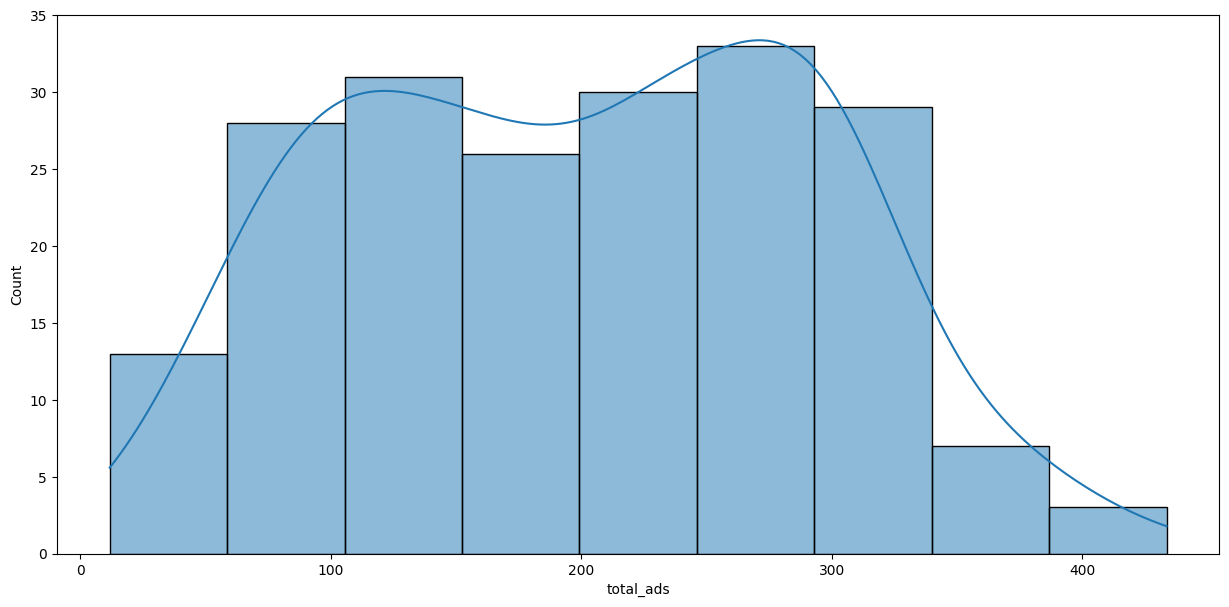

In [19]:
# Histogram to show total_ads distribution
plt.figure(figsize=(15, 7))
sns.histplot(data= df, x= "total_ads", kde= True);

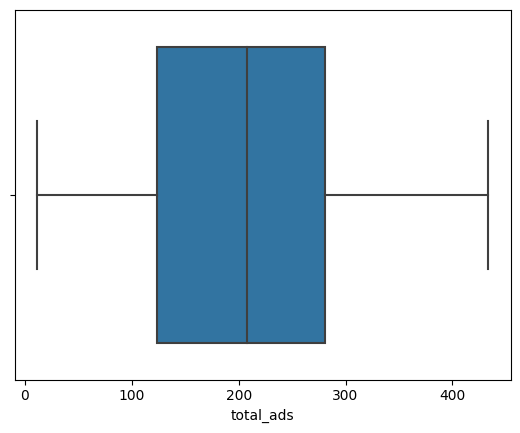

In [20]:
sns.boxplot(data = df, x = 'total_ads');

C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


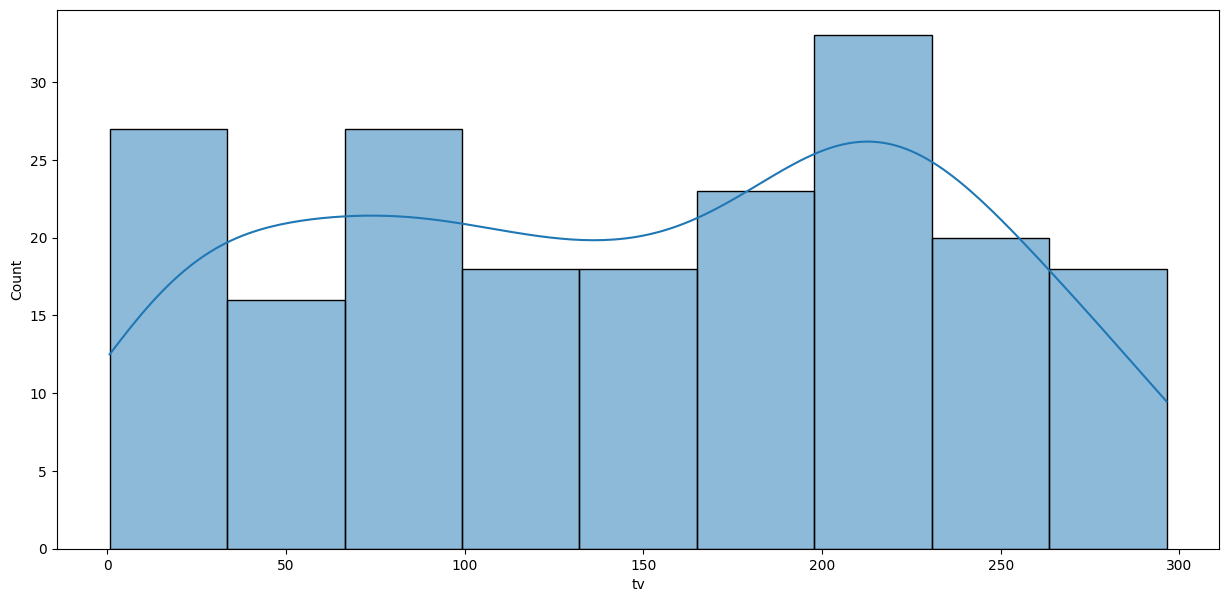

In [21]:
# Histogram to show total_ads distribution
plt.figure(figsize=(15, 7))
sns.histplot(data= df, x= "tv", kde= True);

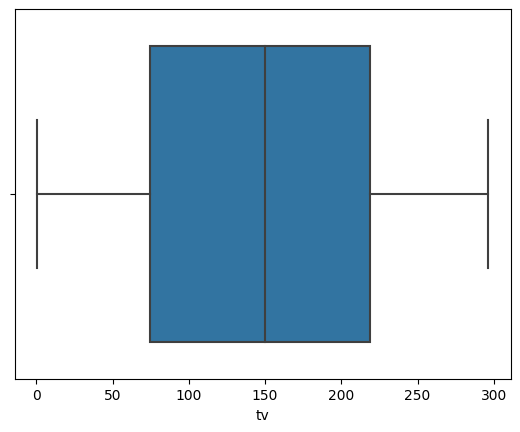

In [22]:
sns.boxplot(data = df, x = 'tv');

C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


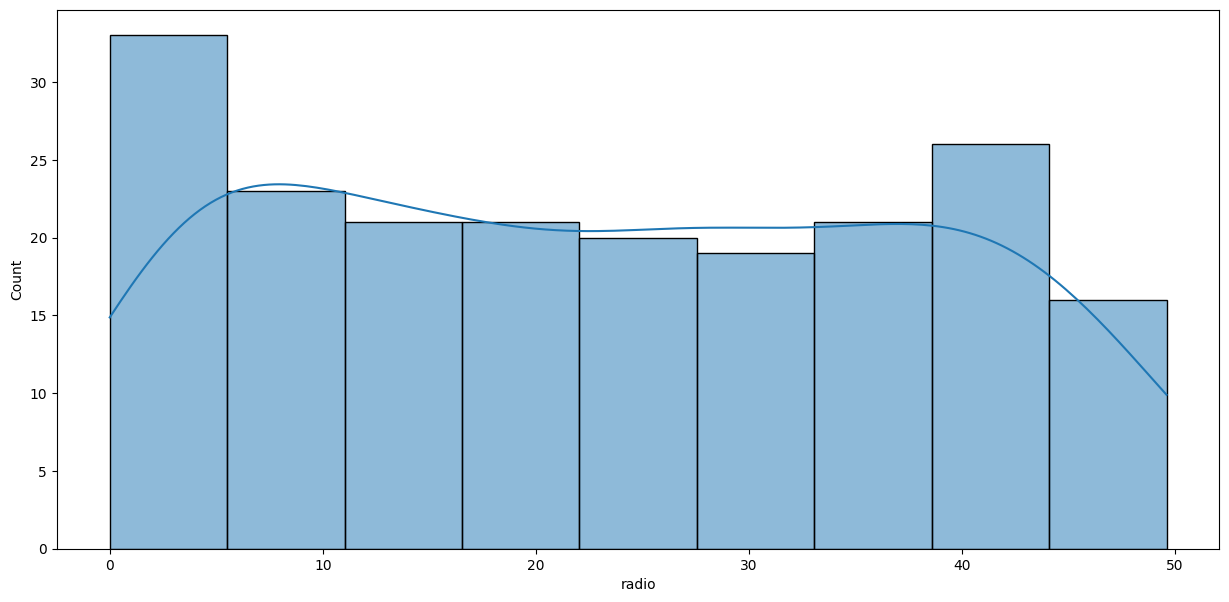

In [23]:
# Histogram to show total_ads distribution
plt.figure(figsize=(15, 7))
sns.histplot(data= df, x= "radio", kde= True);

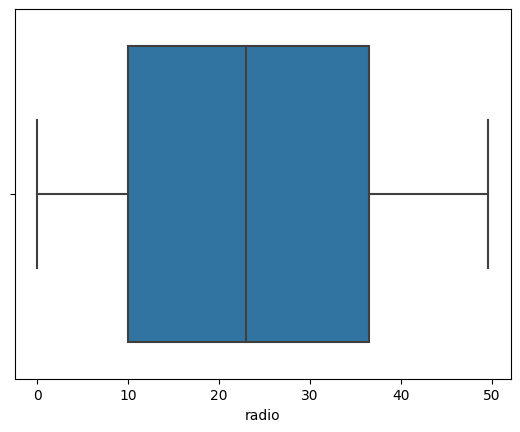

In [24]:
sns.boxplot(data = df, x = 'radio');

C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


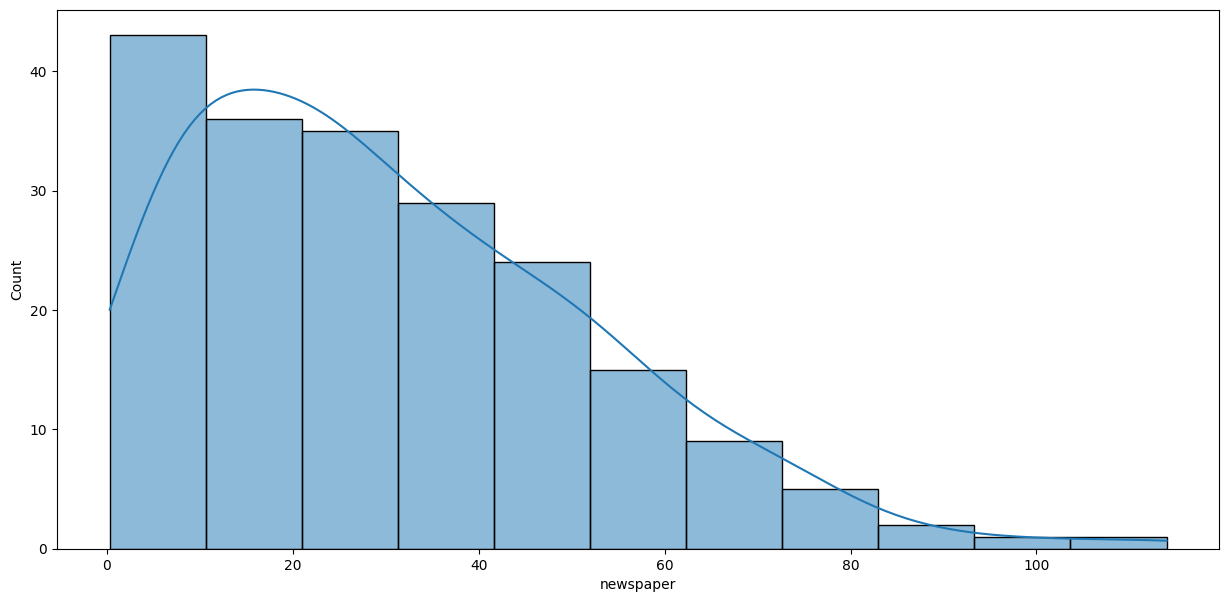

In [25]:
# Histogram to show total_ads distribution
plt.figure(figsize=(15, 7))
sns.histplot(data= df, x= "newspaper", kde= True);

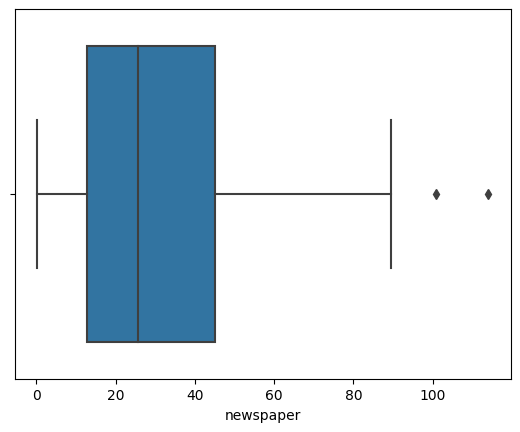

In [26]:
sns.boxplot(data = df, x = 'newspaper');

#### Insights

- *The distribution of total_ads, radio and tv are normaly distributed, indicating that a majority of data points center around the mid point.  This is evident from the bell shape of the graphs.*

- *the distribution of newspaper is lightly skewed to the right with just two outliers.*

### Bivariate Analysis

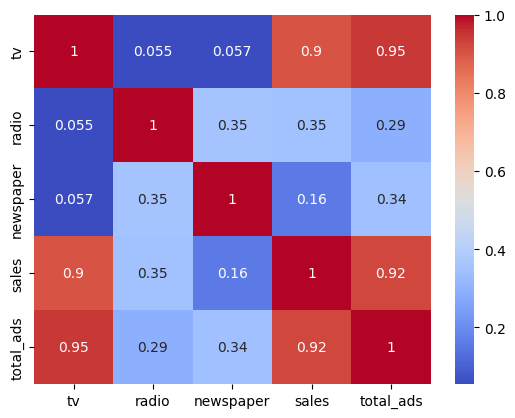

In [27]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

#### Insights

- *Total_ads and tv, have a strong positive correlation with sales*
- *Total_ads and tv are important predictors of sales, but they are also highly correlated to each other.*
- *Total_ads seems to be the most important predictor of conversion*

### Multivariate Analysis

C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

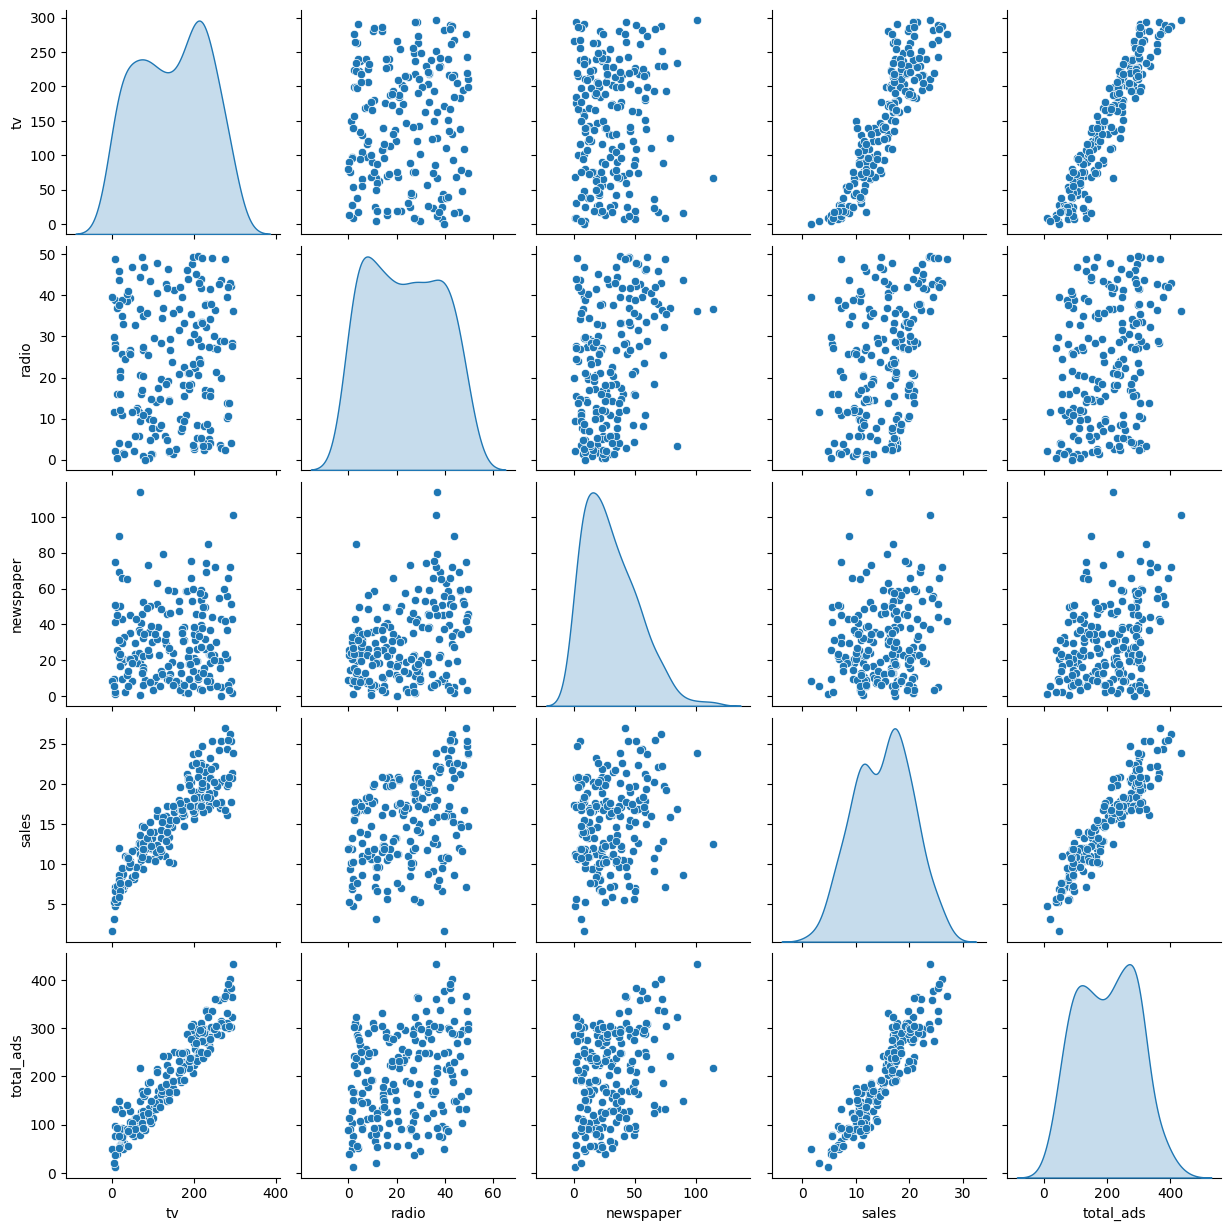

In [28]:
# pairplot to visualize all numeric variables at once

sns.pairplot(df, diag_kind="kde");

#### Insights

- *The numerical features like tv,total_ads,sales shows linear correlation*
- *The distributions are mostly normal, except in the case of newspapers.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       200 non-null    object 
 1   tv         200 non-null    float64
 2   radio      200 non-null    float64
 3   newspaper  200 non-null    float64
 4   sales      200 non-null    float64
 5   total_ads  200 non-null    float64
dtypes: float64(5), object(1)
memory usage: 9.5+ KB


## Data Preprocessing

#### Convert time to numerical variable

In [30]:
df['week_number'] = df['time'].str.extract('(\d+)').astype(int)

In [41]:
# Extract week number from 'time' column
df1 = df
df1['week_number'] = df1['time'].str.extract('(\d+)').astype(int)
df1['year'] = (df1['week_number'] - 1) // 52 + 1

# Display the dataframe with the new 'Year' column
print(df1[['time', 'week_number', 'year']].head(60))

       time  week_number  year
0    Week 1            1     1
1    Week 2            2     1
2    Week 3            3     1
3    Week 4            4     1
4    Week 5            5     1
5    Week 6            6     1
6    Week 7            7     1
7    Week 8            8     1
8    Week 9            9     1
9   Week 10           10     1
10  Week 11           11     1
11  Week 12           12     1
12  Week 13           13     1
13  Week 14           14     1
14  Week 15           15     1
15  Week 16           16     1
16  Week 17           17     1
17  Week 18           18     1
18  Week 19           19     1
19  Week 20           20     1
20  Week 21           21     1
21  Week 22           22     1
22  Week 23           23     1
23  Week 24           24     1
24  Week 25           25     1
25  Week 26           26     1
26  Week 27           27     1
27  Week 28           28     1
28  Week 29           29     1
29  Week 30           30     1
30  Week 31           31     1
31  Week

#### Treat Missing Values

In [42]:
df1.isnull().sum()

time           0
tv             0
radio          0
newspaper      0
sales          0
total_ads      0
week_number    0
year           0
dtype: int64

#### INSIGHTS
-* no missing values*

## Building Machine Learning Model

1. Split the data into train & test to be able us evaluate the model that we build on the train data.
2. Build a Linear Regression model using the train data by fitting the model
3. Evaluate the performance on the training data 
4. Evaluate the performance on the test data
5. The goal is to minimize error between training and test data

#### Split the data randomly

In [43]:
# Import ML libraries & algoritmhms

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [44]:
# defining the dependent and independent variables
X = df1.drop(["sales","time"], axis=1)
y = df1["sales"]

In [45]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [46]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 140
Number of rows in test data = 60


#### Model Building with Linear Regression Algorithm


In [47]:
# fitting a linear model
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

### Model Evaluation on training & testing data

In [48]:
# get the score (R-squared) on the training set

print(
    "The score (R-squared) on the training set is ",
  lin_reg_model.score(x_train, y_train),
)

The score (R-squared) on the training set is  0.889594335038397


In [49]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
           
        },
        index=[0],
    )

    return df_perf

#### Evaluate training data performance

In [50]:
# Checking model performance on train set
print(" Table for Training Data Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

 Table for Training Data Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,1.703226,1.283242,0.889594,0.884614


#### Evaluate testing data performance

In [51]:
# Checking model performance on test set
print("Table for Test Data Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Table for Test Data Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,1.525022,1.1344,0.925392,0.916946


#### Insights


- **Training Data**: Both RMSE (1.70) and MAE (1.28) suggest a moderate level of error in the model's predictions on the training data.$R^2$ R-squared (0.88) and Adj. R-squared (0.88) indicate that the model explains around 88% of the variance in the target variable on the training data.
- **Testing Data**: There's a slight decrease in RMSE (1.52) and MAE (1.13) on the test data compared to training, indicating a small increase in accuracy & increase in error rate for unseen (test) data. However, R-squared (0.93) and Adj. R-squared (0.92) show a relatively high increase, suggesting the model performs better on dataset it hasnt seen before.
- **Overall Performance**: a significant increase in performance is observed on the test data, the model seems to be generalizing well.  The relatively high R-squared values, more so on the test data, suggest the model captures a large portion of the linear relationship between the features and the target variable.

We can improve the model accuracy with feature selection or trying out a different algorithm

In [52]:
#for every linear regression we have intercept and coeff or slope
#To retrieve the intercept:
print(lin_reg_model.intercept_)
#For retrieving the slope:
print(lin_reg_model.coef_)

4.968386004027815
[ 0.01339346  0.07114651 -0.04428777  0.0402522  -0.00055858 -0.07101345]


In [53]:
#lets make prediction with the model on the test data
y_pred = lin_reg_model.predict(x_test)

In [54]:
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
dfnew = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dfnew.head(10)

,Actual,Predicted
0,20.5,18.908179
1,8.7,8.112115
2,7.6,7.809663
3,17.5,18.093863
4,14.0,13.563523
5,17.4,19.065821
6,24.2,23.345320
7,13.2,10.139329
8,11.9,12.495208
9,13.2,13.477715


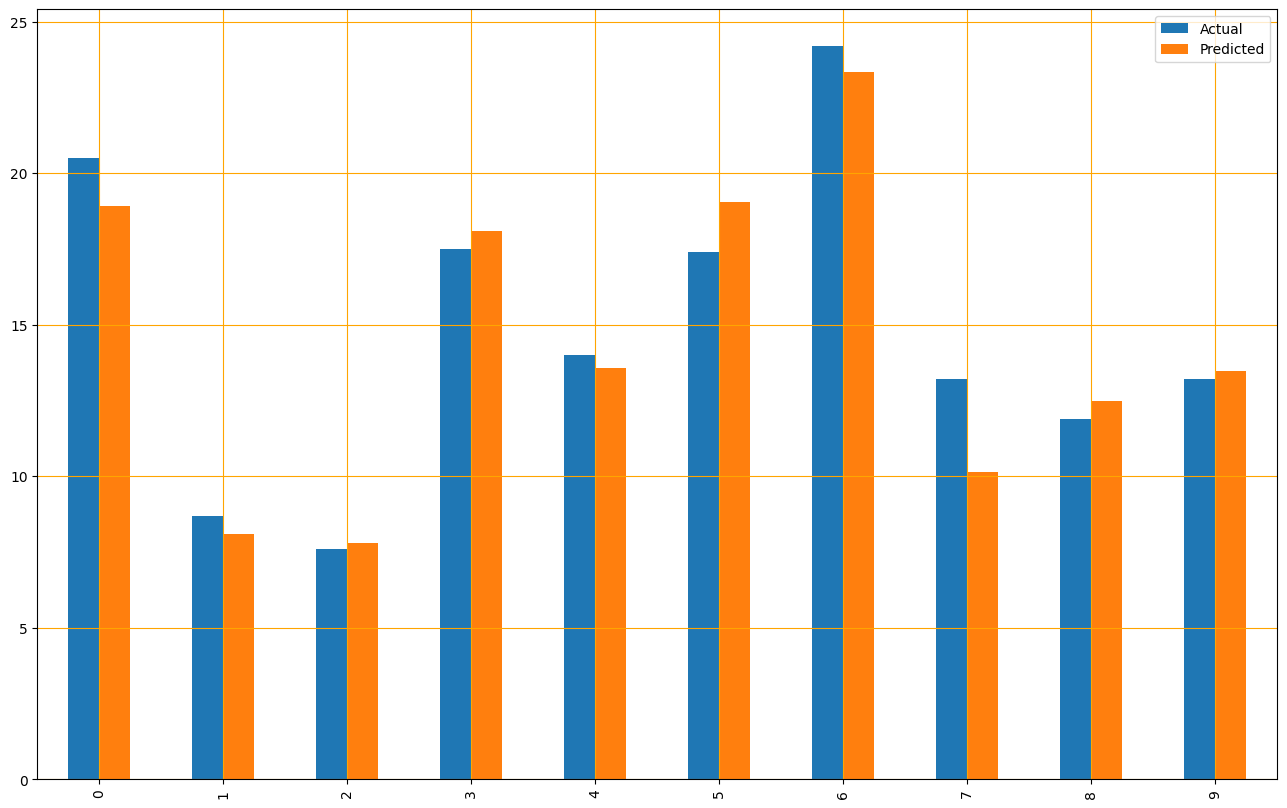

In [55]:
#let's create a visual with the 1st 25 values. you can create bar graph with this method too
#evaluate.head(10).plot(kind = ‘bar’)
df2 = dfnew.head(10)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.8', color='orange')
plt.grid(which='minor', linestyle=':', linewidth='0.8', color='red')
plt.show()

## Insights & Recommendation

1. Our linear regression model effectively accounts for 93% of the variance observed in the data, indicating a reasonably good fit.

2. analysis shows that total_ads and tv significantly influence sales positively.

3. Based on these findings, we recommend that Activewear Inc prioritize targeting tv campaigns in their upcoming marketing campaigns and budgeting to maximize their return on investment.


By implementing these data-driven approach, Activewear Inc can expect to:

Optimize Marketing Spend: By identifying the most influential features & focus their marketing efforts on the channels that generate the highest conversion

# Let's explore couple of ways to see if we can improve the model accuracy

1. Step 1: Feature selection & importance
2. Step 2: Using a different algorithm like random forest

## Step 1:  Feature Selection 

-* drop columns with multicolinearity*

In [62]:
# drop variables that show multicolinearity
# defining the dependent and independent variables. drop 
X = df1.drop(["sales","time", "total_ads"], axis=1)
y = df1["sales"]

In [63]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [64]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 140
Number of rows in test data = 60


In [65]:
# fitting a linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train, y_train)

LinearRegression()

## Checking model performance on train & test set


In [66]:
# Checking model performance on train set
print(" Table for Training Data Performance\n")
lin_reg_model2_train_perf = model_performance_regression(lin_reg_model2, x_train, y_train)
lin_reg_model2_train_perf

 Table for Training Data Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,1.686246,1.271853,0.900164,0.896439


In [67]:
# Checking model performance on test set
print("Table for Test Data Performance\n")
lin_reg_model2_test_perf = model_performance_regression(lin_reg_model2, x_test, y_test)
lin_reg_model2_test_perf

Table for Test Data Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,1.57979,1.214965,0.902215,0.89316


There is no significant improvement in model 2 using feature selection.
We can further improve the model performance by trying out a more sophisticated algorithm or hyper parameter tuning

## Random Forest Algorithm

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
# drop variables with CTR that has low negative correlation
# defining the dependent and independent variables. drop 
X = df1.drop(["sales","time","total_ads"], axis=1)
y = df1["sales"]

In [72]:
#creates a Random Forest Regressor model with the following parameters; number of decision trees to build in the forest (10,000 in this case). n_job = -1 his instructs the model to use all available CPU cores for training (if possible).
forest = RandomForestRegressor (n_estimators = 10000, random_state=0, n_jobs = -1)
forest.fit(X,y)


RandomForestRegressor(n_estimators=10000, n_jobs=-1, random_state=0)

In [81]:
df1.columns

Index(['time', 'tv', 'radio', 'newspaper', 'sales', 'total_ads', 'week_number',
       'year'],
      dtype='object')

In [82]:
#selects all columns from the dataframe
features_label = df1.columns


#This code extracts the feature importance scores from the trained Random Forest model.
importances = forest.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) time                           0.849537
 2) tv                             0.129774
 3) radio                          0.009846
 4) newspaper                      0.009387
 5) sales                          0.001456


#### Insights on the features

1. Higher Scores Mean Greater Importance: Features with higher importance scores have a greater influence on the model's predictions. In the context of conversion prediction, these features are more likely to be significant factors that affect sales.

2. Focus on Top Features: Analyze the features with the highest importance scores first. These features provide the most valuable insights into what drives conversions.

3. Understanding Feature Impact:  Investigate the relationship between the top features and the target variable (conversion). Are there positive or negative correlations? How do these features influence the likelihood of conversion?

In [75]:
#train the model using randomforest algorithm
forest_regressor_model = RandomForestRegressor ()
forest_regressor_model.fit(x_train, y_train) #training the algorithm

RandomForestRegressor()

## Checking model performance on train & test set

In [76]:
# Checking model performance on train set
print(" Table for Training Data Performance\n")
forest_regressor_model_train_perf = model_performance_regression(forest_regressor_model, x_train, y_train)
forest_regressor_model_train_perf

 Table for Training Data Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.547895,0.411014,0.98946,0.989067


In [77]:
# Checking model performance on test set
print(" Table for Training Data Performance\n")
forest_regressor_model_test_perf = model_performance_regression(forest_regressor_model, x_test, y_test)
forest_regressor_model_test_perf

 Table for Training Data Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.994436,0.827483,0.961254,0.957666


#### Insights


- **Training Data**: Both RMSE and MAE are relatively low (0.52 and 0.39, respectively). R-squared and Adj. R-squared are very high (0.99), indicating a seemingly good fit on the training data.*
- **Testing Data**: although still quite low we see an increase in RMSE and MAE values as opposed to train results. The R-squared and adj R-squared see a dip but are still in the high 90's this shows that the model has a lower prediction with not seen data. however the difference is miniscule but still points to a bit of overfitting.*


#### PREDICTING NEXT QUARTER
-* Predict Future Sales: Use the trained model to predict sales for the next 13 weeks using the last 13 weeks' advertising budgets as future data*

In [97]:
# Generate the next 13 weeks' week_number and year values
last_week_number = df1['week_number'].max()
last_year = df1['year'].max()
future_week_numbers = [(last_week_number + i) % 52 for i in range(1, 14)]
future_years = [last_year + ((last_week_number + i) // 52) for i in range(1, 14)]

# If a week_number is 0, it should be 52 and reduce the year by 1
for i in range(len(future_week_numbers)):
    if future_week_numbers[i] == 0:
        future_week_numbers[i] = 52
        future_years[i] -= 1

# Get the last 13 weeks' advertising data (tv, radio, newspaper)
future_data_advertising = df1[['tv', 'radio', 'newspaper']].tail(13).reset_index(drop=True)

# Combine the advertising data with the future week_number and year
future_data = future_data_advertising.copy()
future_data['week_number'] = future_week_numbers
future_data['year'] = future_years

# Predict sales for the next 13 weeks
future_sales_pred = forest_regressor_model.predict(future_data)

# Create a DataFrame for the future predictions
future_weeks = [f'Week {i}' for i in range(df1['week_number'].max() + 1, df1['week_number'].max() + 14)]
future_df = pd.DataFrame({
    'time': future_weeks,
    'tv': future_data['tv'],
    'radio': future_data['radio'],
    'newspaper': future_data['newspaper'],
    'week_number': future_data['week_number'],
    'year': future_data['year'],
    'predicted_sales': future_sales_pred
})

# Display the future predictions
print(future_df)


        time     tv  radio  newspaper  week_number  year  predicted_sales
0   Week 201  191.1   28.7       18.2           45     7           17.932
1   Week 202  286.0   13.9        3.7           46     7           19.937
2   Week 203   18.7   12.1       23.4           47     7            7.302
3   Week 204   39.5   41.1        5.8           48     7           11.189
4   Week 205   75.5   10.8        6.0           49     7           11.669
5   Week 206   17.2    4.1       31.6           50     7            6.752
6   Week 207  166.8   42.0        3.6           51     7           18.778
7   Week 208  149.7   35.6        6.0           52     7           15.524
8   Week 209   38.2    3.7       13.8            1     8            8.489
9   Week 210   94.2    4.9        8.1            2     8           13.126
10  Week 211  177.0    9.3        6.4            3     8           16.333
11  Week 212  283.6   42.0       66.2            4     8           24.423
12  Week 213  232.1    8.6        8.7 

# Overall Recommendation for Activewear Inc

### Insights
- **Random Forest Overfitting**:The Random Forest model exhibits a slightly significant difference between training and testing performance. This indicates a bit of overfitting. Over all the model performs excellently

- **Linear Regression Generalizability**: The Linear Regression model shows a smaller gap between training and testing performance. While there's a slight increase in accuracy on unseen data, the model seems to be generalizing very well.

### Overall Recommendation

- Based on the slight overfitting in the Random Forest but still higher R-squared values and lower RMSE and MAE values than the linear regression model**The Random Forest model is the recommended approach for predicting sales in this instance.  It provides higher more reliable predictions and valuable insights for optimizing sales strategies.**


### Conclusion

- **Use Random Forest model for the Sales Prediction: Since Activewear Inc is looking to improve predict/improve sales. It can provide reliable predictions and valuable insights for optimizing sales strategies.**

## Improvement Techniques to Further Explore to Improve Model Accuracy

1. **Model Improvement with Hyperparameter Tuning: Try adjusting hyperparameters like the number of trees, maximum depth of trees, or minimum samples per split to find a balance between training and test performance.**

2. **Regularization: Techniques like L1 or L2 regularization can penalize model complexity and potentially reduce overfitting.**

3. **If you suspect a linear relationship might not capture the complexity of your data, you can explore other regression models that can handle non-linearity,** such as:
Polynomial Regression (introduces non-linearity with feature transformations)
Support Vector Regression (can handle non-linearity using kernel functions)
However, these models are more prone to overfitting, so careful hyperparameter tuning and evaluation on a separate validation set are crucial